In [1]:
import scanpy as sc
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import paste # need for color palette

def subset_cells(original, processed):
    new_ids = set(processed.obs.index)
    new_ids = {i.split('.')[0] for i in new_ids}
    orig_ids = set(original.obs.index)
    subset_ids = new_ids.intersection(orig_ids)
    orig_sub = original[list(subset_ids)].copy()
    return orig_sub

In [2]:
palette=['#1B9E77','#D95F02','#7570B3','#E7298A','#66A61E','#E6AB02','#A6761D']

In [3]:
which_slice = "151674"

In [4]:
orig = sc.read_visium(f"../data/DLPFC/sample-3/{which_slice}/", count_file=f"{which_slice}_filtered_feature_bc_matrix.h5")
orig.var_names_make_unique()
#fig6_paste_clusters = pd.read_csv("Center-H-clusters-fig6d.csv", index_col=0)
#fig6_paste_clusters.index = pd.Index([i.split('.')[0] for i in fig6_paste_clusters.index])

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
processed_data = sc.read_h5ad(f"../data/DLPFC/saved_results/center2_a0.1_KL_seed2.h5ad")
processed_data.obs.index = pd.Index([i.split('.')[0] for i in processed_data.obs.index]) # correct indices so that they match with the original 

In [6]:
genes_kept = list(processed_data.var_names)

orig_sub = subset_cells(orig, processed_data)
orig_sub = orig_sub[processed_data.obs.index, genes_kept]

processed_data.uns['spatial'] = orig_sub.uns['spatial']
processed_data.obsm['spatial'] = orig_sub.obsm['spatial']
sc.pp.log1p(processed_data)
processed_data.obs.rename(columns={"clustering_W":"Inferred Clusters"}, inplace=True)

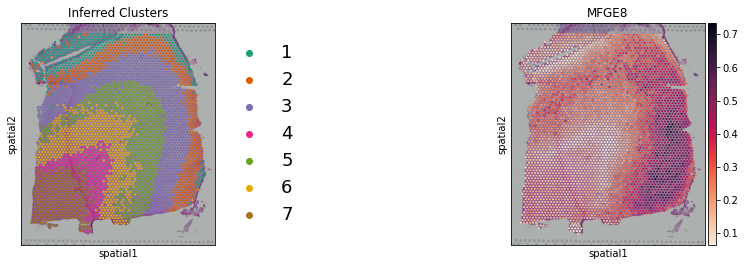

In [7]:
sc.pl.spatial(processed_data, img_key="hires", color=["Inferred Clusters", "MFGE8"], palette=['#1B9E77','#D95F02','#7570B3','#E7298A','#66A61E','#E6AB02','#A6761D'], 
              cmap="rocket_r", legend_fontsize=18)#, save="dlpfc-he-and-spot-viz.pdf")